<a href="https://colab.research.google.com/github/yaseminozkut/CS210-Data-Science/blob/main/IMDB%20Movies%20Project/Project_Final_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Comparing and Predicting Metascores of the IMDB Movies - Group 3]

Group Members:

Yasemin Özkut

Emirhan Kaya

Ekin Fırat Evren

Berfin Rumeysa Karakış

Oğul Sümer

## Introduction

<font color="white">

When we looked at the dataset we noticed some inconsistent results between IMDB ratings and metascores. We wanted to explore more on this area and find the reasoning behind it if there is one. IMDb scores are found by the average votes of the IMDb users' votes. However, for the Metascores, this is not the case. Metascores are found by the weighted average of the published critic reviews. By doing this project, we want to observe and understand the relationship between IMDb voting system and Metascore voting system.

https://www.metacritic.com/about-metascores

</font>

### Problem Definition

<font color="white">
Our aim is to find if the Metascores are predictable or completely random. The given dataset “IMDB Movies” between 2006-2016 will be our train data. First, we will analyze how the IMDB movies’ Metascores changes according to their genre, director, IMDB ratings and votes number, several leading actors. Then we will try to create the best machine learning model with the best accuracy level. 
</font>

### Utilized Datasets

<font color="white">

Dataset link: https://drive.google.com/file/d/1-1aZGfAlXgtn0gLfGpZdqXGGkfB_UbkG/view?usp=sharing

Our dataset is given by our instructor Öznur Taştan.
</font>

In [ ]:
from google.colab import drive
drive.mount("./drive")
path_prefix = "./drive/My Drive"

Drive already mounted at ./drive; to attempt to forcibly remount, call drive.mount("./drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_boston
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import svm
from sklearn import linear_model
fname = "IMDB-Movie-Data-withID.csv"
df = pd.read_csv(join(path_prefix, fname))
df.head()

,Unnamed: 0,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,imdbID,movieLensID
0,0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,2015381,112852.0
1,1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,1446714,94864.0
2,2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,4972582,166534.0
3,3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,3470600,167036.0
4,4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,1386697,135536.0


In [ ]:
df.dtypes

Unnamed: 0              int64
Rank                    int64
Title                  object
Genre                  object
Description            object
Director               object
Actors                 object
Year                    int64
Runtime (Minutes)       int64
Rating                float64
Votes                   int64
Revenue (Millions)    float64
Metascore             float64
imdbID                  int64
movieLensID           float64
dtype: object

In [ ]:
df = df.drop(['Unnamed: 0'], axis=1) #We drop the unnecessary column
columns = len(df.columns)
rows = len(df)
print("There are", columns, "columns and", rows ,"rows in the dataframe.")

There are 14 columns and 993 rows in the dataframe.


<font color="white">

In the dataset there are 993 number of observations and 14 columns. Data type of the dataset is multivariate. Data type of "Title", "Genre", "Description", "Director", and "Actor" columns is string; "Rank", "Year", "Runtime (Minutes)", "Votes", and "imdbID" columns is integer; "Rating", "Revenue (Millions)", "Metascore", and "movieLensID" columns is float.

Data types and brief description of the columns:

Rank(int64) contains the Movie rank order

Title(object) contains the name of the movie

Genre(object) A comma-separated list of genres used to classify the film

Description contains a brief summary about the movie

Director(object) contains the name of the director, contains 644 unique values

Actors (object) A comma-separated list of the main stars of the film

Year(int64) The year that the film released as an integer.

Runtime (Minutes)(int64) The duration of the film in minutes.

Rating(float64) User rating for the movie 0-10

Votes(int64) Number of votes

Revenue (Millions)(float64) Movie revenue in millions

Metascore(float64) An aggregated average of critic scores. Values are between 0 and 100. Higher scores represent positive reviews.

imdbID(int64) ID that represents that movie in IMDB database

movieLensID(float64) ID that represent that movie in movielens database

</font>

In [ ]:
df.dropna(subset = ["Metascore"], inplace=True)
df.dropna(subset = ["Revenue (Millions)"], inplace=True)
dfML = df.copy() #copy of the dataframe too be used for the machine learning model
dfCopy = df.copy()

In [ ]:
rows = len(df)
print("There are", columns, "columns and", rows ,"rows in the dataframe after we get rid of the NaN values.")

There are 14 columns and 832 rows in the dataframe after we get rid of the NaN values.


In [ ]:
#Our data description after the removing the NaN values
df.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,imdbID,movieLensID
count,832.000000,832.000000,832.000000,832.000000,8.320000e+02,832.000000,832.000000,8.320000e+02,832.000000
mean,484.957933,2012.507212,114.671875,6.818510,1.938521e+05,85.053185,59.557692,1.907665e+06,109660.399038
std,286.310392,3.177455,18.500965,0.868859,1.935994e+05,104.733721,16.973939,1.227028e+06,37400.269846
min,1.000000,2006.000000,66.000000,1.900000,1.780000e+02,0.000000,11.000000,2.066340e+05,44193.000000
25%,237.750000,2010.000000,101.000000,6.300000,6.163350e+04,14.092500,47.000000,1.022092e+06,80438.000000
50%,475.500000,2013.000000,112.000000,6.900000,1.371600e+05,49.710000,60.000000,1.621957e+06,106739.000000
75%,728.250000,2015.000000,124.000000,7.500000,2.724448e+05,117.237500,72.000000,2.513564e+06,141878.500000
max,1000.000000,2016.000000,187.000000,9.000000,1.791916e+06,936.630000,100.000000,7.371706e+06,175671.000000


As we analyze the most important numerical columns, we can see that the average of the release year of the movies is 2012, average runtime is 114.67 minutes, average IMDb rating is 6.81, and average metascore is 59.55.

In [ ]:
actiondf = df['Genre'] 
actiondf

0       Action,Adventure,Sci-Fi
1      Adventure,Mystery,Sci-Fi
2               Horror,Thriller
3       Animation,Comedy,Family
4      Action,Adventure,Fantasy
                 ...           
986     Action,Adventure,Horror
987                      Comedy
989                      Horror
990         Drama,Music,Romance
992       Comedy,Family,Fantasy
Name: Genre, Length: 832, dtype: object

In [ ]:
df['Genre'].value_counts()

Action,Adventure,Sci-Fi    50
Comedy,Drama,Romance       30
Drama                      29
Drama,Romance              27
Comedy                     26
                           ..
Drama,Family,Music          1
Adventure,Drama,Western     1
Action,Horror,Mystery       1
Comedy,Family,Romance       1
Animation,Fantasy           1
Name: Genre, Length: 189, dtype: int64

In [ ]:
df2 = df.copy()
movieList = []
for movie in df2['Title']:
  movieList.append(movie)
movieList = set(movieList)
print("There are", len(movieList), "different movies in the data.")

directorList = []
for director in df2['Director']:
  directorList.append(director)
directorList = set(directorList)
print("There are", len(directorList), "different directors in the data.")

df2['Actors'] = [list(actors.split(", ")) for actors in df2['Actors']]
actorsList = []
for actors in df2['Actors']:
  actorsList = actorsList + actors
actorsList = set(actorsList)
print("There are", len(actorsList), "different actors in the data.")

df2['Genre'] = [list(genre.split(",")) for genre in df2['Genre']]
genreList = []
for genre in df2['Genre']:
  genreList = genreList + genre
genreList = set(genreList)
print("There are", len(genreList), "different genres in the data.")

There are 831 different movies in the data.
There are 522 different directors in the data.
There are 1671 different actors in the data.
There are 20 different genres in the data.


In [ ]:
genreDict = {}
for x in genreList:
  genreDict[x] = 0

for row in df2['Genre']:
  for genre in row:
    for keys in genreDict:
      if (genre == keys):
        genreDict[genre] += 1
print("Genre and their counts:\n")
genreDict

Genre and their counts:



{'Action': 275,
 'Adventure': 243,
 'Animation': 45,
 'Biography': 66,
 'Comedy': 248,
 'Crime': 125,
 'Drama': 415,
 'Family': 48,
 'Fantasy': 91,
 'History': 24,
 'Horror': 87,
 'Music': 15,
 'Musical': 5,
 'Mystery': 86,
 'Romance': 119,
 'Sci-Fi': 106,
 'Sport': 15,
 'Thriller': 147,
 'War': 10,
 'Western': 4}

## Data Exploration

We created labels for using them in the following codes

In [ ]:
#Our rating ranges:
#1.9-5.3
#5.4-6
#6.1.-6.5
#6.6-7
#7- 7.5
#7.6- 8.1
#8.1 -9
df_sns = df.copy()

lab = []
for rating in df_sns['Rating']:
    if rating <= 1.9:
        lab.append('Very Bad')
    elif 5.4 <= rating  <= 6:
        lab.append('Bad') 
    elif 6.1 <= rating  <= 6.5:
        lab.append('Average') 
    elif 6.6 <= rating  <= 7:
        lab.append('Good') 
    elif 7 <= rating  <= 7.5:
        lab.append('Good+') 
    elif 7.6 <= rating  <= 8.1:
        lab.append('Very Good') 
    else:
        lab.append('Excellent')       
df_sns['Rating_Label'] = lab

labe = []
for metascore in df_sns['Metascore']:
    if metascore <= 19:
        labe.append('Overwhelming Dislike') 
    elif 20 <= metascore  <= 39:
        labe.append('Generally Unfavorable Reviews') 
    elif 40 <= metascore  <= 60:
        labe.append('Mixed or Average Reviews') 
    elif 61 <= metascore  <= 80:
        labe.append('Generally Favorable Reviews') 
    else:
        labe.append('Universal Acclaim')        
df_sns['Metascore_Label'] = labe
df_sns.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,imdbID,movieLensID,Rating_Label,Metascore_Label
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,2015381,112852.0,Very Good,Generally Favorable Reviews
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,1446714,94864.0,Good,Generally Favorable Reviews
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,4972582,166534.0,Good+,Generally Favorable Reviews
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,3470600,167036.0,Good+,Mixed or Average Reviews
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,1386697,135536.0,Average,Mixed or Average Reviews


### Bar Charts and Histograms

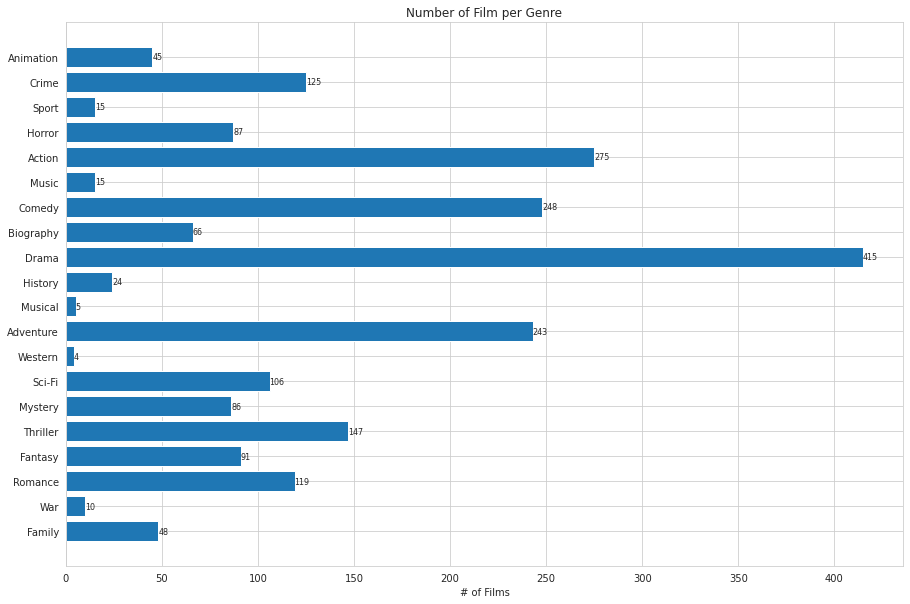

In [ ]:
#Number of movies in each Genre
x = list(genreDict.keys())
y = list(genreDict.values())
fig, ax = plt.subplots(figsize=(15,10))
plt.barh(x, y)

for count, month in zip(y, x):
    plt.text(count, month,  f"{count:.0f}", verticalalignment = "center", fontsize = 8 )

plt.xlabel("# of Films")
plt.title("Number of Film per Genre")

plt.show()

We saw that the most common genre was Drama with a count of 415, followed by Action with a count of 275. 

Least common genre was Western with a count of 4.

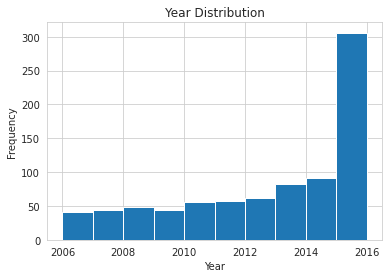

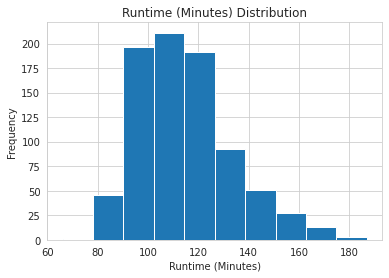

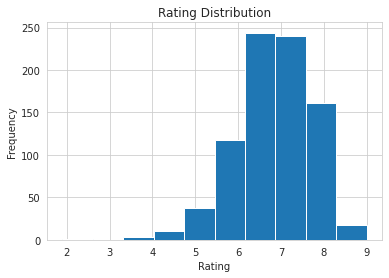

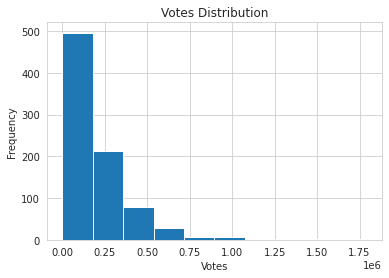

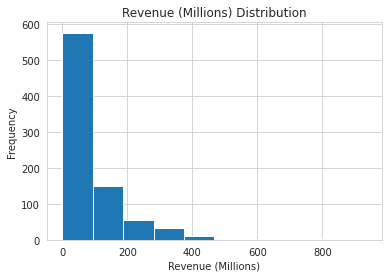

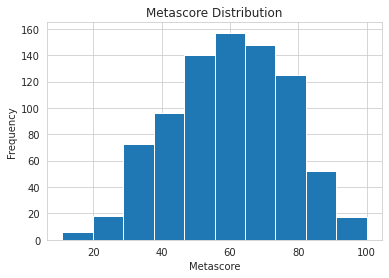

In [ ]:
ax = df['Year'].plot.hist()
ax.set_title('Year Distribution')
ax.set_xlabel('Year')
plt.show()

ax = df['Runtime (Minutes)'].plot.hist()
ax.set_title('Runtime (Minutes) Distribution')
ax.set_xlabel('Runtime (Minutes)')
plt.show()

ax = df['Rating'].plot.hist()
ax.set_title('Rating Distribution')
ax.set_xlabel('Rating')
plt.show()

ax = df['Votes'].plot.hist()
ax.set_title('Votes Distribution')
ax.set_xlabel('Votes')
plt.show()

ax = df['Revenue (Millions)'].plot.hist()
ax.set_title('Revenue (Millions) Distribution')
ax.set_xlabel('Revenue (Millions)')
plt.show()

ax = df['Metascore'].plot.hist()
ax.set_title('Metascore Distribution')
ax.set_xlabel('Metascore')
plt.show()

<font color="white">

We have analyzed and manupulated the data to find the unique genres, actors, directors, and movies in the data. According to our findings, there are 992 different movies in the data. Since, our data has 993 rows, we can see that 1 movie is repeating. In addition, there are 641 different directors, 2005 different actors, and 20 different genres in the data. The distributions of the numerical columns are given above with the histogram charts.

</font>

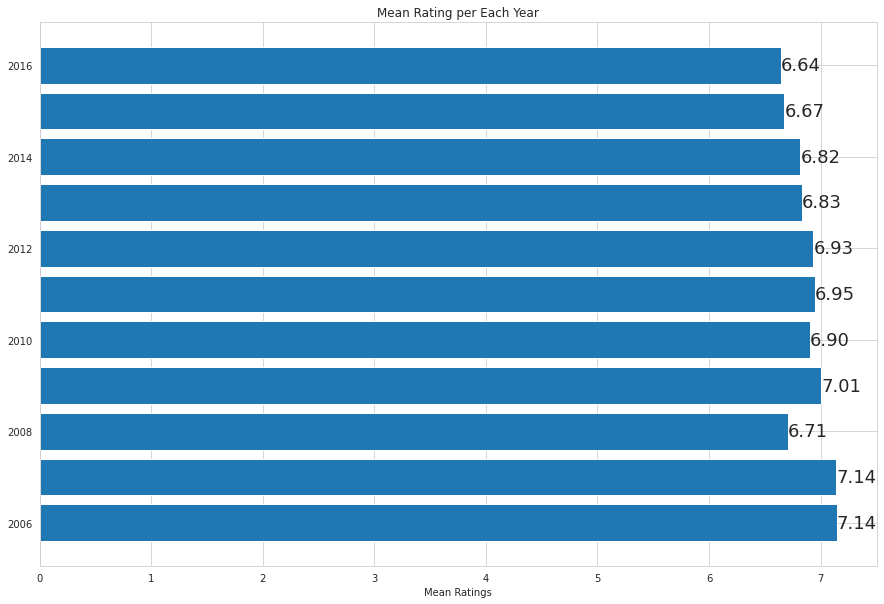

In [ ]:
#Mean Rating for each year (or for each genre)
years = [2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
means_by_years = []
for year in years:
    df_mean = df_sns[df_sns['Year'] == year]['Rating'].mean()
    means_by_years.append(df_mean)

x = years
y = means_by_years
fig, ax = plt.subplots(figsize=(15,10))
plt.barh(x, y)

for count, month in zip(y, x):
    plt.text(count, month,  f"{count:.2f}", verticalalignment = "center", fontsize = 18 )

plt.xlabel("Mean Ratings")
plt.title("Mean Rating per Each Year")

plt.show()

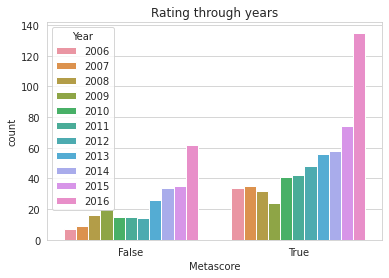

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style('whitegrid')
sns.countplot(x=(df.Metascore>50),hue=df.Year)
plt.title('Rating through years')
plt.show()

With this graph we tried to understand that how Metascores are distributed through the years 2006-2016, **True** meaning metascore is higher than 50 and **False** meaning metascore is lower than 50.

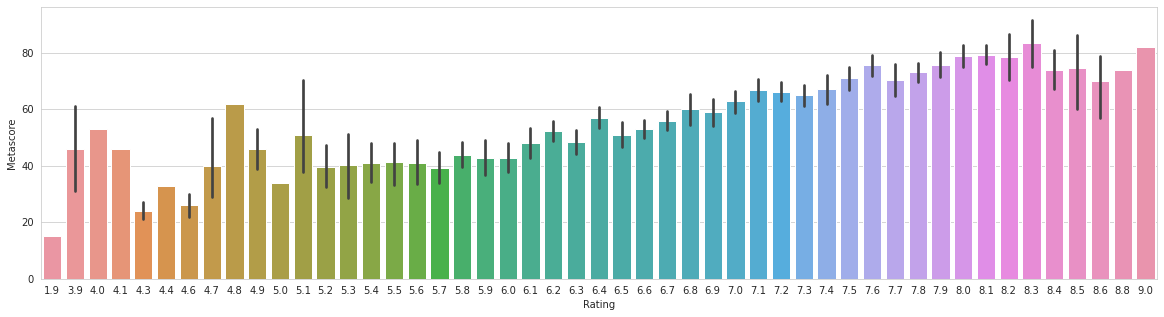

In [ ]:
plt.figure(figsize=[20,5])
sns.barplot(x="Rating",y='Metascore',data=df)
plt.show()

We saw that when rating increases, Metascore also increases

###Scatter Plots and Correlations

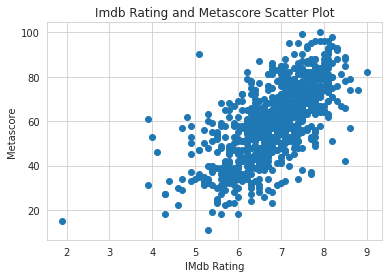

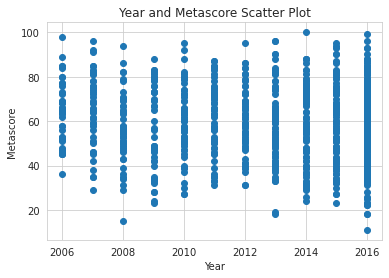

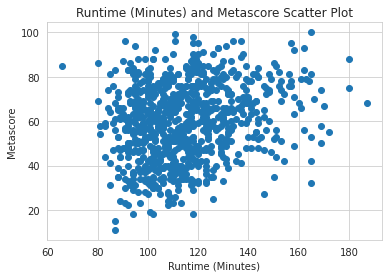

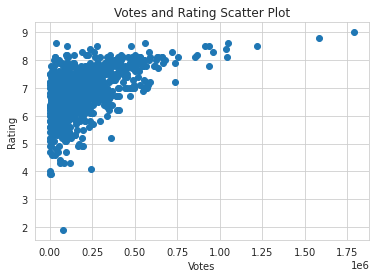

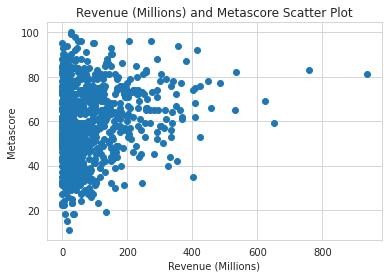

In [ ]:
plt.scatter(df["Rating"], df["Metascore"])
plt.xlabel("IMdb Rating")
plt.ylabel("Metascore")
plt.title("Imdb Rating and Metascore Scatter Plot")
plt.show()

plt.scatter(df["Year"], df["Metascore"])
plt.xlabel("Year")
plt.ylabel("Metascore")
plt.title("Year and Metascore Scatter Plot")
plt.show()

plt.scatter(df["Runtime (Minutes)"], df["Metascore"])
plt.xlabel("Runtime (Minutes)")
plt.ylabel("Metascore")
plt.title("Runtime (Minutes) and Metascore Scatter Plot")
plt.show()

plt.scatter(df["Votes"], df["Rating"])
plt.xlabel("Votes")
plt.ylabel("Rating")
plt.title("Votes and Rating Scatter Plot")
plt.show()

plt.scatter(df["Revenue (Millions)"], df["Metascore"])
plt.xlabel("Revenue (Millions)")
plt.ylabel("Metascore")
plt.title("Revenue (Millions) and Metascore Scatter Plot")
plt.show()

#You can scroll up and down in the output to see all of the histogram graphs


<font color="white">

According to the scatter plot of "Imdb Rating and Metascore Scatter Plot", even though there are some outliers, we can see that there is a positive correlation between IMDb Ratings and Metascores. 

For now, we could not say anything about the "Year and Metascore Scatter Plot" because it seems like year is a categorical variable. However we will find the average Metascores for the each year in the upcoming days.

If we look at the "Runtime (Minutes) and Metascore Scatter Plot", we can see that the data points are very scattered. There is no correlation between Runtime (Minutes) and Metascores.

We also wanted to find if the number of votes affects the IMDb Ratings. From the scatter plot "Votes and Rating Scatter Plot", we can se an exponential positive relationship between them. When the votes increases, the IMDb ratings also increases but it is a concave down increase. 

Lastly, we wanted to find if the revenue of the film affects the metascore. We anticipated that if revenue was high, metascores would be high. However, we could not find any correlation between them. We can see that movies with high metascores have both low and high revenues.

</font>

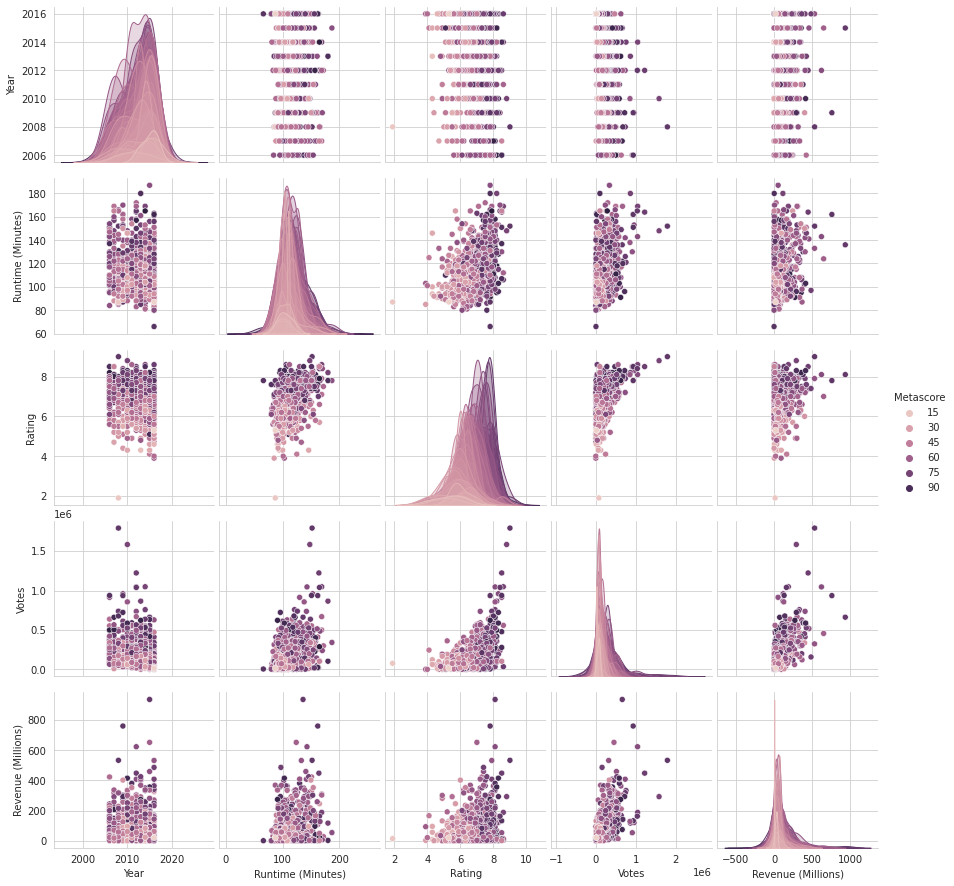

In [ ]:
nf = df.copy()
nf=nf.drop(['Rank','imdbID','movieLensID'],axis=1)

sns.pairplot(nf,hue='Metascore')

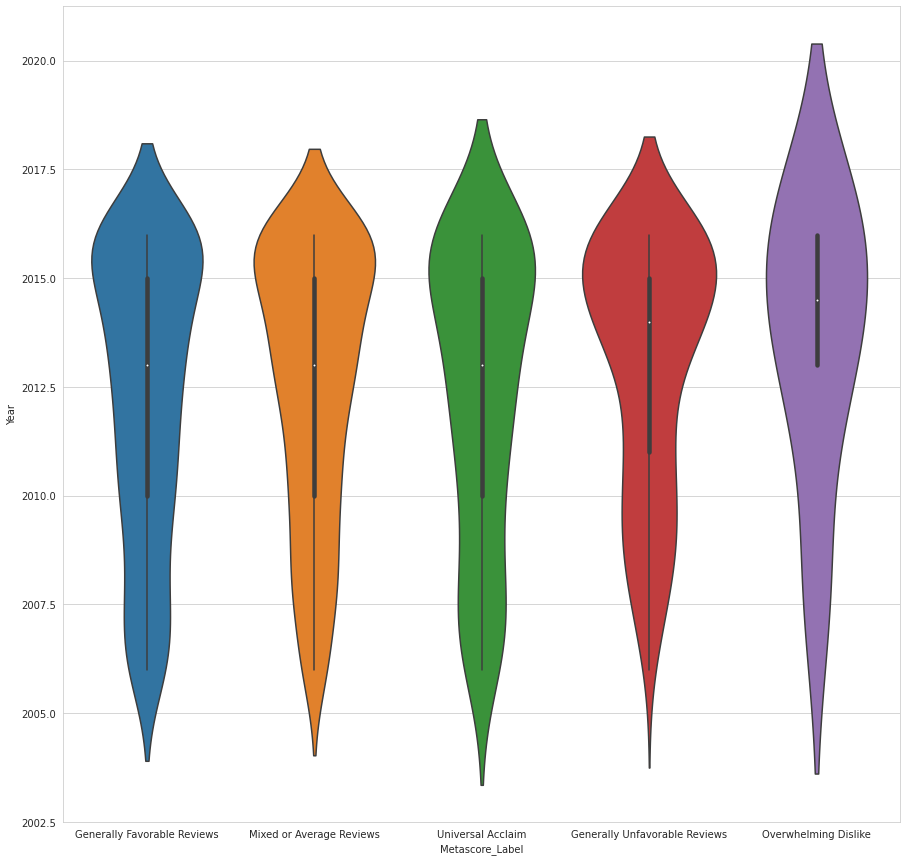

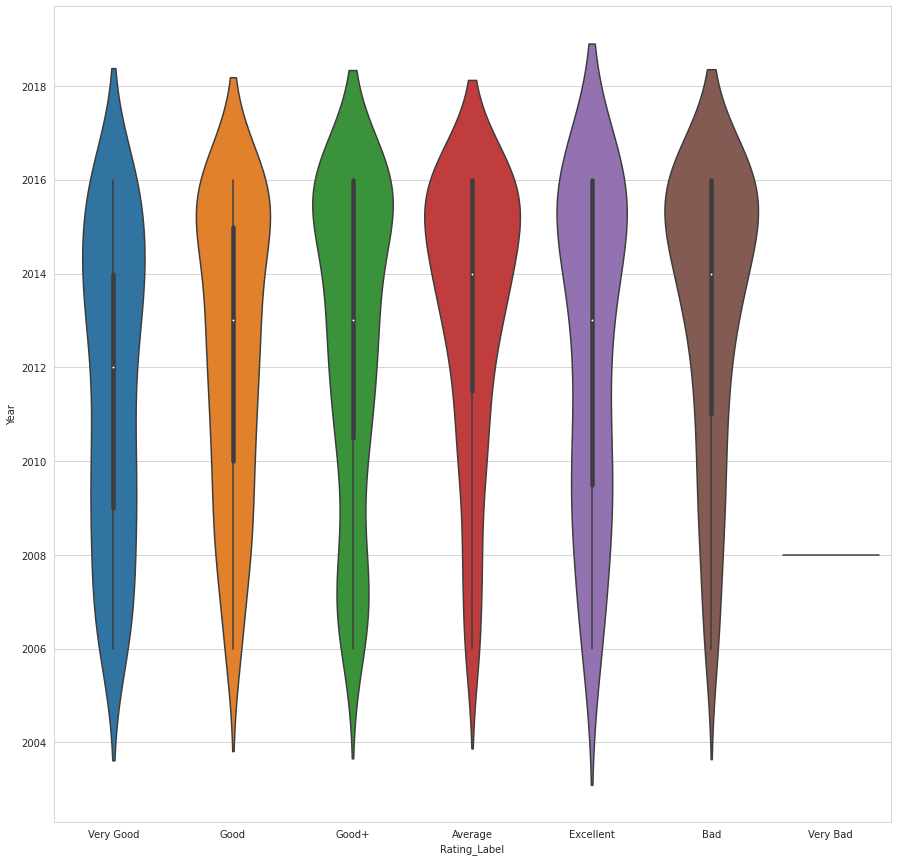

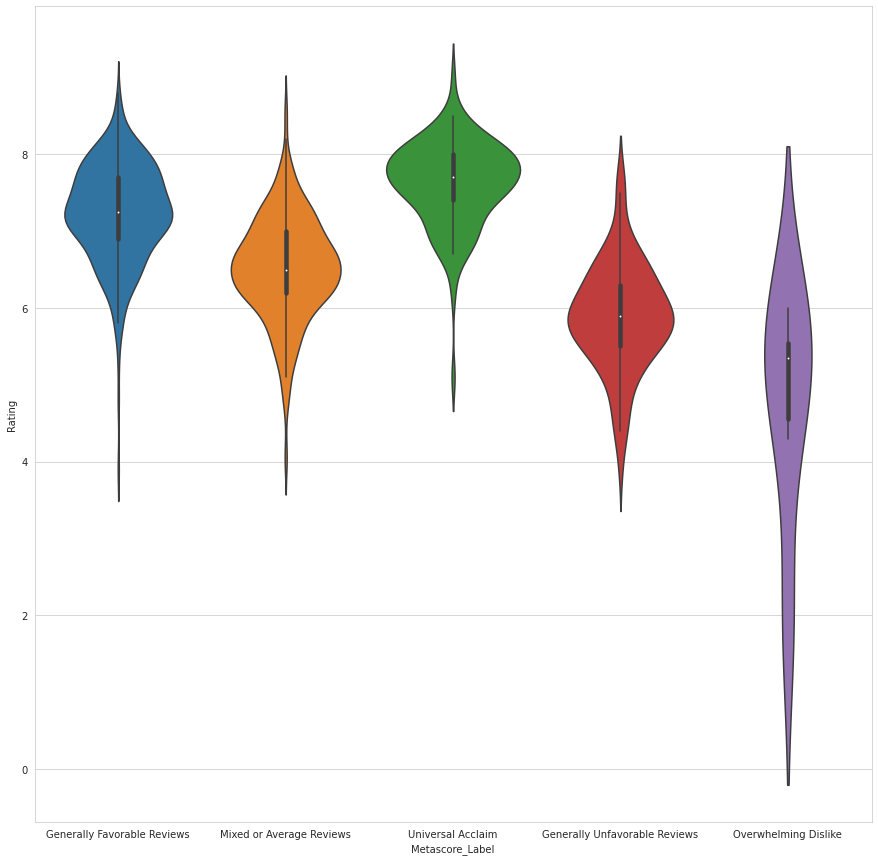

In [ ]:
plt.figure(figsize=(15,15))
sns.violinplot(x='Metascore_Label',y='Year',data=df_sns)
plt.show()
plt.figure(figsize=(15,15))
sns.violinplot(x='Rating_Label',y='Year',data=df_sns)
plt.show()
plt.figure(figsize=(15,15))
sns.violinplot(x='Metascore_Label',y='Rating',data=df_sns)
plt.show()

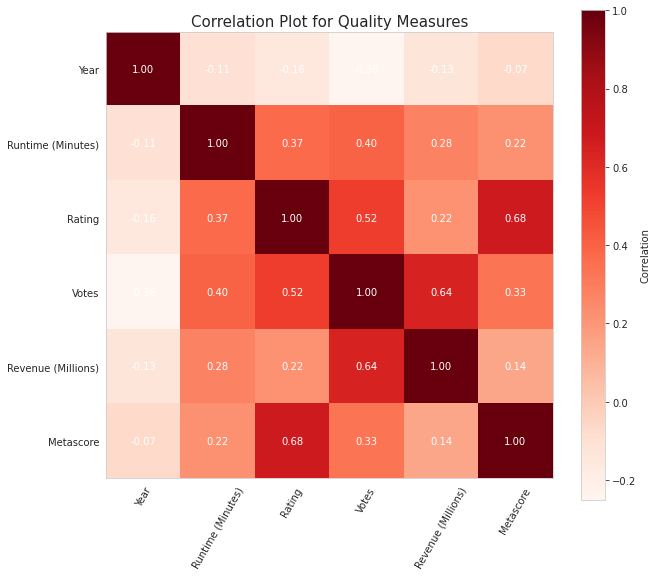

In [ ]:
#Correlation Heatmap

corr = df_sns.iloc[0:, 6:12].corr()
corr_vals = corr.values
fig = plt.figure(figsize=(10,9))
plt.imshow(corr_vals,cmap='Reds')
plt.yticks(range(len(corr.columns)),corr.columns)
plt.xticks(range(len(corr.columns)),corr.columns,rotation=60)
plt.clim(-0.25, 1.0)
plt.colorbar(label='Correlation')
plt.title('Correlation Plot for Quality Measures', {'fontsize':15})

for i in range(len(corr_vals[0])):
    for j in range(len(corr_vals[1])):
        plt.text(i,j, '{:.2f}'.format(float(corr_vals[i][j])), ha='center', va='center', c='w')
plt.grid(False)
plt.show()

As can be seen from the correlation heatmap, metascore is most correlated with rating with the correlation value of 0.68.

# Machine Learning Models



##Linear Regression

We dropped the unnecessarry columns for the machine learning model.

We assigned dummy variables to our categorical columns.

###1st Linear Regression Model for Predicting The Metascore

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

dfML = dfML.drop(['Rank', 'Description', 'imdbID', 'movieLensID', 'Title', 'Actors'], axis=1)
encoder = OrdinalEncoder()
dfML['Genre'] = encoder.fit_transform(dfML[['Genre']])
dfML['Director'] = encoder.fit_transform(dfML[['Director']])
dfML.head()

,Genre,Director,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,11.0,208.0,2014,121,8.1,757074,333.13,76.0
1,79.0,415.0,2012,124,7.0,485820,126.46,65.0
2,181.0,315.0,2016,117,7.3,157606,138.12,62.0
3,86.0,85.0,2016,108,7.2,60545,270.32,59.0
4,7.0,109.0,2016,123,6.2,393727,325.02,40.0


In [ ]:
from sklearn.model_selection import train_test_split

X = dfML.drop('Metascore', axis=1)
y= dfML['Metascore']
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.30, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_remaining, y_remaining, test_size=0.50, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
model = LinearRegression()  
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
features = ['Genre', 'Director', 'Year', 'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)']
coeff_df = pd.DataFrame(model.coef_, features, columns=['Coefficient'])  
coeff_df
p_val_df = pd.DataFrame(model.coef_)
coeff_df

,Coefficient
Genre,4.812076e-02
Director,3.997921e-04
Year,2.216502e-01
Runtime (Minutes),-1.476731e-02
Rating,1.331369e+01
Votes,-6.009841e-07
Revenue (Millions),1.171901e-02


 Evaluation Metrics

*MSE (mean squared error):*  $\frac{1}{N}\sum_i \, (y_{true_i} - y_{pred_i})^2 \,$


*RMSE (root mean squared error):*  $\sqrt{\frac{1}{N}\sum_i \, (y_{true_i} - y_{pred_i})^2}$


*MAE (mean absolute error):* $\sum_i \, |y_{true_i} - y_{pred_i}| \,$

Since we are measuring the errors, we want to minimize these metrics.

In [ ]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_prediction =  model.predict(X_test)
y_prediction
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print("r2 score is ",score)
print("mean_sqrd_error is==",mean_squared_error(y_test,y_prediction))
print("root_mean_squared error of is==",np.sqrt(mean_squared_error(y_test,y_prediction)))
print("mean absolute error is ==", mean_absolute_error(y_test, y_pred))

r2 score is  0.46819487247169833
mean_sqrd_error is== 127.80864971893837
root_mean_squared error of is== 11.305248768556062
mean absolute error is == 58.024


The model's r-square is 0.468. This means all explanatory variables are able to explain 46.8% of the variation in the Metascore.

###2nd Linear Regression Model for Predicting The Metascore Range

When our linear regression had a lower accuracy we tried to predict the Metascore range instead of the actual Metascore.

In [ ]:
dfML2 = df.copy() #copy of the dataframe too be used for the machine learning model
dfML2.rename(columns={
        'Runtime (Minutes)': 'Runtime', 
        'Revenue (Millions)': 'Revenue'
    }, inplace=True)
dfML2.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime', 'Rating', 'Votes', 'Revenue', 'Metascore', 'imdbID',
       'movieLensID'],
      dtype='object')

In [ ]:
dfML2.isnull().sum()

Rank           0
Title          0
Genre          0
Description    0
Director       0
Actors         0
Year           0
Runtime        0
Rating         0
Votes          0
Revenue        0
Metascore      0
imdbID         0
movieLensID    0
dtype: int64

In [ ]:
dfML2.dropna(inplace=True)  

In [ ]:
dfML2.isnull().sum()

Rank           0
Title          0
Genre          0
Description    0
Director       0
Actors         0
Year           0
Runtime        0
Rating         0
Votes          0
Revenue        0
Metascore      0
imdbID         0
movieLensID    0
dtype: int64

In [ ]:
dfML2.columns
dfML2.drop(['imdbID', 'movieLensID', 'Rank', 'Title', 'Description', 'Actors'], axis=1, inplace=True)
dfML2.columns

Index(['Genre', 'Director', 'Year', 'Runtime', 'Rating', 'Votes', 'Revenue',
       'Metascore'],
      dtype='object')

In [ ]:
genre_list = list(genreDict.keys())

for genre in genre_list:
    dfML2[genre] = dfML2.Genre.apply(lambda x: genre in x).astype(int)

dfML2.head()

,Genre,Director,Year,Runtime,Rating,Votes,Revenue,Metascore,Family,War,Romance,Fantasy,Thriller,Mystery,Sci-Fi,Western,Adventure,Musical,History,Drama,Biography,Comedy,Music,Action,Horror,Sport,Crime,Animation
0,"Action,Adventure,Sci-Fi",James Gunn,2014,121,8.1,757074,333.13,76.0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0
1,"Adventure,Mystery,Sci-Fi",Ridley Scott,2012,124,7.0,485820,126.46,65.0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0
2,"Horror,Thriller",M. Night Shyamalan,2016,117,7.3,157606,138.12,62.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,"Animation,Comedy,Family",Christophe Lourdelet,2016,108,7.2,60545,270.32,59.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,"Action,Adventure,Fantasy",David Ayer,2016,123,6.2,393727,325.02,40.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
director_encoded=le.fit_transform(dfML2['Director'])
dfML2['Director'] = director_encoded
dfML2.drop(['Genre'], axis=1, inplace=True)
dfML2.head()

,Director,Year,Runtime,Rating,Votes,Revenue,Metascore,Family,War,Romance,Fantasy,Thriller,Mystery,Sci-Fi,Western,Adventure,Musical,History,Drama,Biography,Comedy,Music,Action,Horror,Sport,Crime,Animation
0,208,2014,121,8.1,757074,333.13,76.0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0
1,415,2012,124,7.0,485820,126.46,65.0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0
2,315,2016,117,7.3,157606,138.12,62.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,85,2016,108,7.2,60545,270.32,59.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,109,2016,123,6.2,393727,325.02,40.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
label = []

for metascore in dfML2['Metascore']:
    if metascore <= 19:
        label.append(0) #Overwhelming Dislike
    elif 20 <= metascore  <= 39:
        label.append(1) #Generally Unfavorable Reviews
    elif 40 <= metascore  <= 60:
        label.append(2) #Mixed or Average Reviews
    elif 61 <= metascore  <= 80:
        label.append(3) #Generally Favorable Reviews
    else:
        label.append(4) #Universal Acclaim
        
dfML2['Label'] = label
dfML2.head()
dfML2.columns

Index(['Director', 'Year', 'Runtime', 'Rating', 'Votes', 'Revenue',
       'Metascore', 'Family', 'War', 'Romance', 'Fantasy', 'Thriller',
       'Mystery', 'Sci-Fi', 'Western', 'Adventure', 'Musical', 'History',
       'Drama', 'Biography', 'Comedy', 'Music', 'Action', 'Horror', 'Sport',
       'Crime', 'Animation', 'Label'],
      dtype='object')

In [ ]:
IMDB_Features_df = pd.DataFrame(dfML2, columns= ['Director', 'Year', 'Runtime', 'Rating', 'Votes', 'Revenue' , 'Metascore', 'Animation', 'Thriller', 'Sci-Fi', 'Crime', 'Western',
       'Comedy', 'Adventure', 'Romance', 'History', 'War', 'Biography',
       'Sport', 'Fantasy', 'Horror', 'Family', 'Mystery', 'Music', 'Drama',
       'Action', 'Musical'])

IMDB_Label_df = pd.DataFrame(dfML2, columns= ['Label'])
print(IMDB_Features_df.head(5))
print(IMDB_Label_df.head())

   Director  Year  Runtime  Rating  ...  Music  Drama  Action  Musical
0       208  2014      121     8.1  ...      0      0       1        0
1       415  2012      124     7.0  ...      0      0       0        0
2       315  2016      117     7.3  ...      0      0       0        0
3        85  2016      108     7.2  ...      0      0       0        0
4       109  2016      123     6.2  ...      0      0       1        0

[5 rows x 27 columns]
   Label
0      3
1      3
2      3
3      2
4      2


In [ ]:
dfML2.head()

,Director,Year,Runtime,Rating,Votes,Revenue,Metascore,Family,War,Romance,Fantasy,Thriller,Mystery,Sci-Fi,Western,Adventure,Musical,History,Drama,Biography,Comedy,Music,Action,Horror,Sport,Crime,Animation,Label
0,208,2014,121,8.1,757074,333.13,76.0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,3
1,415,2012,124,7.0,485820,126.46,65.0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,3
2,315,2016,117,7.3,157606,138.12,62.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3
3,85,2016,108,7.2,60545,270.32,59.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,2
4,109,2016,123,6.2,393727,325.02,40.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,2


In [ ]:
scores = cross_val_score(linear_model.LinearRegression(), IMDB_Features_df, IMDB_Label_df, scoring='r2') # mean_squared_error
print("Linear Regression Accuracy all Features: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Linear Regression Accuracy all Features: 0.89 (+/- 0.03)


In [ ]:
dfML2.corr(method='pearson')
#rating
#metascore
#votes

,Director,Year,Runtime,Rating,Votes,Revenue,Metascore,Family,War,Romance,Fantasy,Thriller,Mystery,Sci-Fi,Western,Adventure,Musical,History,Drama,Biography,Comedy,Music,Action,Horror,Sport,Crime,Animation,Label
Director,1.000000,-0.001251,-0.006095,-0.012553,-0.017234,-0.033747,0.010433,-0.013320,-0.009698,0.032717,0.026772,0.011282,0.016582,-0.035881,-0.001440,-0.001204,0.036101,0.064137,-0.005334,0.018226,0.011306,-0.040091,-0.016173,-0.006282,-0.073880,-0.045993,0.005925,0.019132
Year,-0.001251,1.000000,-0.105147,-0.155702,-0.363599,-0.129624,-0.065560,-0.023288,-0.059297,0.001775,-0.085078,-0.026358,-0.067907,-0.039463,0.010786,-0.002707,-0.080980,0.044836,0.043532,0.048352,0.053133,-0.047307,-0.004412,0.003553,-0.030176,-0.027967,0.008660,-0.067338
Runtime,-0.006095,-0.105147,1.000000,0.370903,0.398875,0.281595,0.219075,-0.038544,0.012098,-0.033598,0.078699,-0.012572,0.027805,0.060785,0.060439,0.124049,0.054367,0.166178,0.199457,0.136301,-0.286589,0.010424,0.092343,-0.216994,0.040023,0.068408,-0.219634,0.196795
Rating,-0.012553,-0.155702,0.370903,1.000000,0.521508,0.216948,0.677408,-0.042081,0.099266,-0.054175,-0.058471,-0.013867,0.058689,-0.023090,0.034538,-0.002733,0.010879,0.101354,0.257507,0.181714,-0.082885,0.052683,-0.125028,-0.208580,0.041844,0.040235,0.135652,0.644993
Votes,-0.017234,-0.363599,0.398875,0.521508,1.000000,0.636360,0.333214,-0.076978,0.056287,-0.125282,0.072443,0.016289,0.026078,0.247217,0.070610,0.243992,-0.008229,-0.026817,-0.131210,-0.025392,-0.130172,-0.047601,0.209045,-0.149206,-0.042468,0.025409,0.017485,0.324081
Revenue,-0.033747,-0.129624,0.281595,0.216948,0.636360,1.000000,0.143836,0.092403,-0.033320,-0.163967,0.165252,-0.061517,-0.099225,0.195872,0.021518,0.446216,-0.002534,-0.050091,-0.323902,-0.071002,-0.048146,-0.043992,0.288056,-0.155555,-0.023271,-0.084197,0.245143,0.141459
Metascore,0.010433,-0.065560,0.219075,0.677408,0.333214,0.143836,1.000000,-0.048247,0.043838,-0.096608,-0.090294,0.004276,0.034454,-0.031899,0.021274,-0.063187,0.002027,0.146305,0.291992,0.173611,-0.048686,0.009180,-0.231408,-0.062407,0.014716,-0.019178,0.155340,0.945764
Family,-0.013320,-0.023288,-0.038544,-0.042081,-0.076978,0.092403,-0.048247,1.000000,-0.027291,-0.086362,0.194067,-0.114624,-0.084012,-0.094547,-0.017198,0.124485,0.047458,-0.042644,-0.123123,-0.053556,0.052881,0.028477,-0.108110,-0.084556,-0.033527,-0.104042,0.100365,-0.053040
War,-0.009698,-0.059297,0.012098,0.099266,0.056287,-0.033320,0.043838,-0.027291,1.000000,-0.045060,0.032026,0.006743,-0.001219,-0.042145,-0.007666,-0.046589,-0.008576,0.046889,0.066444,-0.032376,-0.071876,-0.017310,-0.007158,-0.037692,-0.014945,-0.046378,-0.026374,0.029231
Romance,0.032717,0.001775,-0.033598,-0.054175,-0.125282,-0.163967,-0.096608,-0.086362,-0.045060,1.000000,-0.088168,-0.162249,-0.059773,-0.104622,0.021237,-0.217107,0.012653,-0.070409,0.162336,-0.069105,0.191604,0.025539,-0.235970,-0.117169,-0.029554,-0.171781,-0.097689,-0.092286


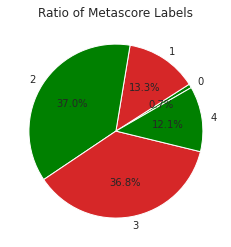

In [ ]:
piedata = dfML2['Label'].value_counts()
pie_labels = [0, 1, 2, 3, 4]
pie_values = [piedata[0], piedata[1], piedata[2], piedata[3] , piedata[4]]
plt.title('Ratio of Metascore Labels')
plt.pie(pie_values, labels= pie_labels, autopct='%1.1f%%', startangle = 30, colors=['g','tab:red']) 
plt.show()

In [ ]:
X = IMDB_Features_df.copy()
y = IMDB_Label_df.copy()

X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.30, random_state=0, stratify=y)
X_test, X_val, y_test, y_val = train_test_split(X_remaining, y_remaining, test_size=0.50, random_state=0, stratify=y_remaining)

##Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(class_weight={0:0.7,1:13.3,2:37.0,3:36.8,4:12.1})
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_val)
y_pred2 = model_rf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [ ]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy with val data:",metrics.accuracy_score(y_val, y_pred))
print("Accuracy with test data:",metrics.accuracy_score(y_test, y_pred2))

Accuracy with val data: 0.968
Accuracy with test data: 0.984


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


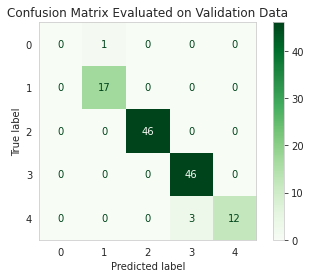

In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
#your code
plot_confusion_matrix(model_rf, X_val, y_val, cmap=plt.cm.Greens)
plt.title('Confusion Matrix Evaluated on Validation Data')
plt.grid(False)
plt.show()

##KNN

In [ ]:
from sklearn.preprocessing import normalize #get the function needed to normalize our data.

X = IMDB_Features_df.copy() #create the X matrix
X = normalize(X) #normalize the matrix to put everything on the same scale
y = IMDB_Label_df.copy() #create the y-variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables

In [ ]:
from sklearn.neighbors import KNeighborsClassifier #the object class we need

knn = KNeighborsClassifier(n_neighbors=50) #create a KNN-classifier with 5 neighbors (default)
knn = knn.fit(X_train, y_train) #this fits the k-nearest neigbor model with the train data
knn.score(X_test, y_test) #calculate the fit on the test data

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.456

## Hypothesis Testing

###1st Hypothesis Testing

HO: There is no difference in the average metascores garnered by movies made in 2006-2014 and 2014-2016.

H1: There is difference in the average metascores garnered by movies made in 2006-2014 and 2014-2016, α  = 0.05, N=832

In [ ]:
dfCopy = df.copy()
count = len(dfCopy[dfCopy['Year'] <= 2013])
print("Count of the movies released before 2013 is", count)
count2 = len(dfCopy[dfCopy['Year'] >= 2014])
print("Count of the movies released after 2014 is", count2)

Count of the movies released before 2013 is 434
Count of the movies released after 2014 is 398


In [ ]:
meta_mean = df['Metascore'].mean() 
print(meta_mean)

59.55769230769231


In [ ]:
from statsmodels.stats.weightstats import ztest as ztest

dfpart1 = df[df['Year'] <= 2013]
dfpart2 = df[df['Year'] >= 2014]

dfpart1 = dfpart1['Metascore'].reset_index().drop(['index'], axis=1)
dfpart2 = dfpart2['Metascore'].reset_index().drop(['index'], axis=1)

part1list = dfpart1['Metascore'].tolist()
part2list = dfpart2['Metascore'].tolist()

test = ztest(part1list, part2list, value=0)
t_statistic = test[0]
p_value = test[1]
print(t_statistic, p_value)

1.5261728838205497 0.1269668146535045


The test statistic for the two sample z-test is 1.5261728838205497 and the corresponding p-value is 0.1269668146535045.

In [ ]:
alpha = 0.05

if p_value <= alpha:
  print("We reject Null Hypothesis")
else:
  print("We fail to reject Null Hypothesis!")

We fail to reject Null Hypothesis!


Since we failed to reject the null hypothesis, and cannot find evidence to the alternative hypothesis; we can say that there is no difference in the average metascores garnered by movies made in 2006-2014 and 2014-2016.

###2nd Hypothesis Testing

HO (Null Hypothesis): Action and adventure metascore averages are different.

H1 (Alternative Hypothesis): Action and adventure metascore averages are not different.

In [ ]:
dfML2.shape
dfML2.columns

Index(['Director', 'Year', 'Runtime', 'Rating', 'Votes', 'Revenue',
       'Metascore', 'Family', 'War', 'Romance', 'Fantasy', 'Thriller',
       'Mystery', 'Sci-Fi', 'Western', 'Adventure', 'Musical', 'History',
       'Drama', 'Biography', 'Comedy', 'Music', 'Action', 'Horror', 'Sport',
       'Crime', 'Animation', 'Label'],
      dtype='object')

In [ ]:
action_meta = []
adventure_meta = []

from statsmodels.stats.weightstats import ztest as ztest

for i in range(len(dfML2)):
    if dfML2.iloc[i, 21] == 1:
        our_meta = dfML2.iloc[i,6]
        action_meta.append(our_meta)

for i in range(len(dfML2)):
    if dfML2.iloc[i, 17] == 1:
        our_meta = dfML2.iloc[i,6]
        adventure_meta.append(our_meta)

test = ztest(action_meta, adventure_meta, value=0)
t_statistic = test[0]
p_value = test[1]
print(t_statistic, p_value)

-2.9042727630104204 0.0036810730858248463


The test statistic for the two sample z-test is -2.9042727630104204 and the corresponding p-value is 0.0036810730858248463.

In [ ]:
alpha = 0.05

if p_value <= alpha:
  print("We reject Null Hypothesis")
else:
  print("We fail to reject Null Hypothesis!")

We reject Null Hypothesis


Since we can reject the null hypothesis, we can say that action and adventure metascore averages are not different.


## Results & Discussion


  The reason why we had high accuracies of 98.4% for Random Forest Classifier and 89% for 2nd Linear Regression Model can be because we were trying to predict the Metascore Range instead of predicting the actual Metascore. On the other hand, the other 2 machine learning models had very close accuracies to each other as 1st Linear Regression Model having 46.8% accuracy and kNN having 45.6% accuracy. These accuracies are relativelty small percentages compared to the other 2 machine learning models. 
  
  The reason can be, predicting the actual Metascores with this given variables are not sufficient enough to accurately predict and explain how the Metascores are determined. In the data there are not enough variables that gives a clue about the movies' content. When we look at our data and our aim to achieve with this data is a little advanced when it comes to machine learning. Our metascore data depends on lots of things. We compared the independent variables with hypothesis tests, graphs and machine learning models and we see that it is better to explain metascore with adding all data and also additional information would be better. 

  Our biggest disadvantage is we don't have enough valuable independent explanatory variables to predict the Metascores since the Metascores also depends on the content of the film etc. This disadvantage also cause some of our models to predict the actual Metascores with very low accuracy levels. 

  However, our second linear regression and random forest classifiers has a good accuracy levels. The biggest advantage of these models is they are predicting the Metascore range, and not the actual Metascore.

## Conclusion



  Using the IMDb dataset given by Öznür teacher, we were, in some degree, able to understand how average metascore is generated by using features such as genres, directors, revenues, IMDb votes and etc. The Random Forest Classifier was the best performing algorithm with 98.4% accuracy. Our second best machine learning model was 2nd linear regression for predicting the metascore range and it gave a score of 89% (+/- 0.03). Third accurate, machine learning model was the 1st linear regression model for predicting the actual metascores with 46.8% accuracy. The least accurate machine learning model was kNN with 45.6% accuracy. 

  All these results that were acquired by machine learning models helped us to understand how metascore is generated for the films throughout the years 2006-2016. Although we could not build a program for calculating the exact metascore, we were able to understand how different features effect the process of generating metascore. With the help of this project, we as a group had a better understanding of Data Science while analyzing the films. First we used visual methods, such as plotting histograms and graphs, to understand better and then we created a hypothesis and worked on its testing.  Finally, we worked on different machine learning models with different combinations of features. 

In the end we concluded that we can predict the Metascores at some levels. However, if we want more accuracy, we need extra explantory variables. 

## Work Division

<font color="white">
Ekin and Emirhan prepared the data and made the exploratory analysis and hypothesis test. Rumeysa and Yasemin will build the machine learning models. We will write more codes if necessary as a group and evaluate the data and create visualization of the data together. We are planning to combine, filter and use these datasets as a group by doing weekly meetings.
</font>